In [1]:
#since I worked with tensorflow for the last project I decided to try it for this one too 
#followed thses guides
#https://www.tensorflow.org/text/tutorials/text_classification_rnn
#https://www.tensorflow.org/guide/keras/rnn#cross-batch_statefulness
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense , Embedding , LSTM ,SimpleRNN, Dropout, Bidirectional
from tensorflow.keras.models import Sequential

import gensim


2022-10-05 11:47:00.460260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 11:47:02.874055: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2022-10-05 11:47:02.874142: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2022-10-05 11:47:02.893697: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2022-10-05 11:47:04.810563: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


### Data
The dataset is a complilation of tweets that was compiled and shared on kaggle for the competition. The goal is to build an RNN NLP and since I worked with tensorflow for the last project I will also use its tools for this one.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
np.shape(train)

(7613, 5)

In [5]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot:>

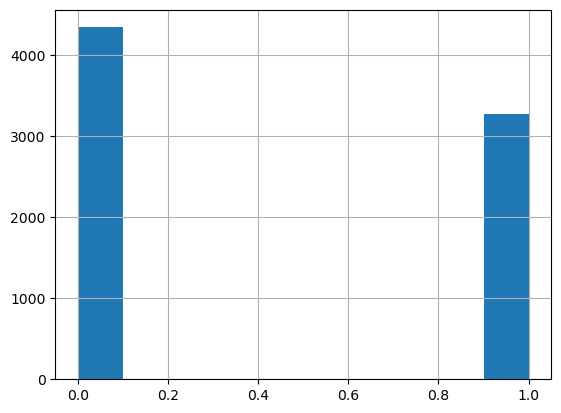

In [6]:
display(train.target.hist())

### Plan
After looking at the data we can see that there is a slight imbalance with the targets. Where 1 represents that the tweet was actually about a distaster and 0 is it wasn't. The data shown in the head show NaNs but I won't worry about that right now since its for keywords and locations and not text.

In [7]:
#vectorize the text
train['text']= train['text'].apply(lambda x : gensim.utils.simple_preprocess(x))
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1


In [8]:
X_train = train['text']
y_train = train['target']
X_test = test['text']


In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_tok,50)
X_test_padded = pad_sequences(X_test_tok,50)

In [10]:
#Base model that should work and will go from there
model1 = Sequential()
model1.add(Embedding(len(tokenizer.index_word)+1,16))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          352832    
                                                                 
 dense (Dense)               (None, None, 64)          1088      
                                                                 
 dense_1 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 353,985
Trainable params: 353,985
Non-trainable params: 0
_________________________________________________________________


2022-10-04 19:25:10.195408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 19:25:10.196794: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 5700 XT)
2022-10-04 19:25:10.371419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 19:25:10.371462: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2022-10-04 19:25:10.371491: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fac

In [12]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history1=model1.fit(X_train_padded,y_train,batch_size=32,epochs=10,verbose=True)

Epoch 1/10


2022-10-04 18:00:13.971465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-04 18:00:14.047135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 18:00:14.047187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21597 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-10-04 18:00:14.048885: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 18:00:14.048924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

238/238 [==============================] - 18s 71ms/step - loss: 0.7557 - accuracy: 0.5720
Epoch 2/10
238/238 [==============================] - 17s 73ms/step - loss: 0.6620 - accuracy: 0.5964
Epoch 3/10
238/238 [==============================] - 17s 72ms/step - loss: 0.6467 - accuracy: 0.6172
Epoch 4/10
238/238 [==============================] - 17s 71ms/step - loss: 0.6390 - accuracy: 0.6236
Epoch 5/10
238/238 [==============================] - 18s 74ms/step - loss: 0.6335 - accuracy: 0.6242
Epoch 6/10
238/238 [==============================] - 17s 71ms/step - loss: 0.6309 - accuracy: 0.6242
Epoch 7/10
238/238 [==============================] - 17s 71ms/step - loss: 0.6288 - accuracy: 0.6242
Epoch 8/10
238/238 [==============================] - 18s 75ms/step - loss: 0.6273 - accuracy: 0.6244
Epoch 9/10
238/238 [==============================] - 44s 184ms/step - loss: 0.6260 - accuracy: 0.6246
Epoch 10/10
238/238 [==============================] - 49s 204ms/step - loss: 0.6261 - accur

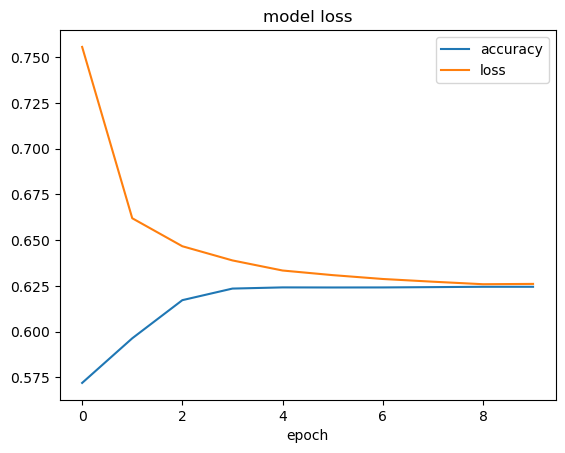

In [14]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()


In [13]:
#added an additional layer and dropout
model2 = Sequential()
model2.add(Embedding(len(tokenizer.index_word)+1,16))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy']) 

In [14]:
history2=model2.fit(X_train_padded,y_train,batch_size=32,epochs=10,verbose=True)

Epoch 1/10


2022-10-04 19:25:37.236489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-04 19:25:37.324100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 19:25:37.324145: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21597 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-10-04 19:25:37.325119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 19:25:37.325151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

238/238 [==============================] - 19s 76ms/step - loss: 0.6774 - accuracy: 0.5795
Epoch 2/10
238/238 [==============================] - 18s 77ms/step - loss: 0.6536 - accuracy: 0.6150
Epoch 3/10
238/238 [==============================] - 18s 74ms/step - loss: 0.6394 - accuracy: 0.6236
Epoch 4/10
238/238 [==============================] - 18s 76ms/step - loss: 0.6331 - accuracy: 0.6243
Epoch 5/10
238/238 [==============================] - 17s 73ms/step - loss: 0.6291 - accuracy: 0.6248
Epoch 6/10
238/238 [==============================] - 17s 73ms/step - loss: 0.6264 - accuracy: 0.6252
Epoch 7/10
238/238 [==============================] - 17s 73ms/step - loss: 0.6245 - accuracy: 0.6260
Epoch 8/10
238/238 [==============================] - 25s 107ms/step - loss: 0.6235 - accuracy: 0.6259
Epoch 9/10
238/238 [==============================] - 50s 210ms/step - loss: 0.6225 - accuracy: 0.6261
Epoch 10/10
238/238 [==============================] - 49s 206ms/step - loss: 0.6222 - accu

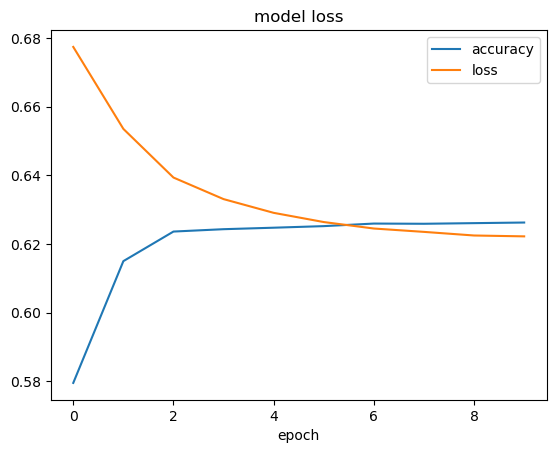

In [15]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

In [10]:
# an improvement but I'll try one more
model3 = Sequential()
model3.add(Embedding(len(tokenizer.index_word)+1,16))
model3.add(SimpleRNN(32, return_sequences=False))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy']) 

2022-10-05 11:47:17.912238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 11:47:17.915442: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 5700 XT)
2022-10-05 11:47:18.093484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 11:47:18.093516: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2022-10-05 11:47:18.093535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fac

In [11]:
history3=model3.fit(X_train_padded,y_train,batch_size=32,epochs=10,verbose=True)

Epoch 1/10


2022-10-05 11:47:21.571994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-05 11:47:21.749925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 11:47:21.749971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21597 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-10-05 11:47:21.751468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 11:47:21.751503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

238/238 [==============================] - 56s 234ms/step - loss: 0.5793 - accuracy: 0.6871
Epoch 2/10
238/238 [==============================] - 56s 235ms/step - loss: 0.3009 - accuracy: 0.8782
Epoch 3/10
238/238 [==============================] - 56s 237ms/step - loss: 0.0983 - accuracy: 0.9655
Epoch 4/10
238/238 [==============================] - 56s 236ms/step - loss: 0.0413 - accuracy: 0.9890
Epoch 5/10
238/238 [==============================] - 57s 241ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 6/10
238/238 [==============================] - 55s 233ms/step - loss: 0.0213 - accuracy: 0.9928
Epoch 7/10
238/238 [==============================] - 57s 238ms/step - loss: 0.0156 - accuracy: 0.9934
Epoch 8/10
238/238 [==============================] - 57s 238ms/step - loss: 0.0127 - accuracy: 0.9941
Epoch 9/10
238/238 [==============================] - 57s 238ms/step - loss: 0.0106 - accuracy: 0.9945
Epoch 10/10
238/238 [==============================] - 64s 268ms/step - loss: 0.0092

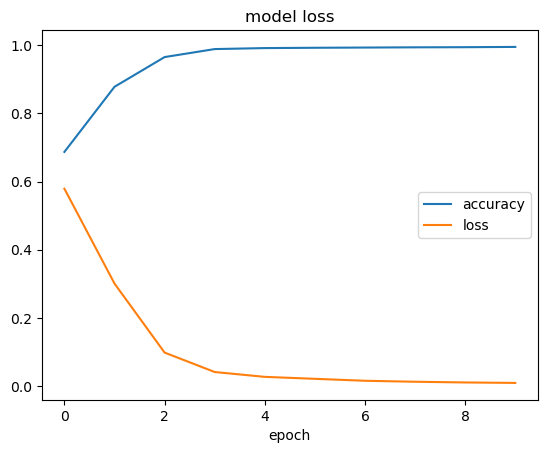

In [12]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

In [20]:
submission= pd.read_csv('sample_submission.csv')
y_pred= model3.predict(X_test_padded)
predictions = []

for pred in y_pred:
    if pred >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        

102/102 [==============================] - 1s 6ms/step


In [23]:
submission['target']=predictions
submission.to_csv("submission.csv", index=False)

### Results, Notes and Conclusion
The exact models I made are limited and although my thrird one is okay, I think I need to reduce the learning rate, I couldn't do a handfull of different functions like LSTM. For that function and even biderectional I kept getting errors for the compliled version of tensorflow/keras. I supose this shouldn't be a shock to me as the build of directml, how I was able to run  tensorflow, was only updated a week prior to working on this. I went with the new one because the old builds I had to use was for tensorflow 1.15 but I could use 2.9 with this. I also ran into issues with the default padding of 32 and had to reduce it to 16 as I assume I was running out of allowed memory but I never got any error only crashes.

The final model I got was a large improvement over the first two and I think I could get the accuracy up higher with a few more revisions. Nevertheless I am happy as shown in the submission it was better than random chance, which is what my last assignment was able to do. I have a feeling there is over fitting and I am really tempted to do project like this again for the final since I can run revisons fairly quickly as opposed to the 4+ hour runs for the CNN model project. 

For future projects I would definitly invest more time in getting a concrete theory around the shape arguments since for this one I was going in blind and was mostly just trying to get the model to build. Like after looking at some other peoples build's they set the base shape to 144 which makes sense since that was the old tweet character limit. As mentioned before I also need to reduce the learning rate and or increase the dropout because it converges very quickly and I also wonder if the size arguments for the RNN and Dense would work better as a divisor of the shape. 

The biggest problem with this class is that I spend as much or more time reading up on the application libraries and builds trying to get functions to work as much as I do on what arguments I should use.